# Read the datasets

In [88]:
import pandas as pd
import xgboost as xgb
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve, log_loss, roc_curve, auc
import pprint
import matplotlib.pyplot as plt

In [237]:
data = pd.read_csv('~/Desktop/Dataset/', na_values = ' ')

In [ ]:
set(data.dtypes)

In [ ]:
dat, discard = train_test_split(data, test_size=0.8, random_state=123)

## APS Dataset

In [765]:
train = pd.read_csv('~/Desktop/Dataset/APS/aps_failure_training_set.csv', skiprows = 20, na_values = 'na')
test = pd.read_csv('~/Desktop/Dataset/APS/aps_failure_test_set.csv', skiprows = 20, na_values = 'na')

In [766]:
train["class"] = train["class"].astype("category").cat.codes
test["class"] = test["class"].astype("category").cat.codes

In [767]:
obj_train = train.select_dtypes(include=['object']).copy()
obj_train.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[60000 rows x 0 columns]>

In [768]:
obj_test = test.select_dtypes(include=['object']).copy()
obj_test.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[16000 rows x 0 columns]>

In [769]:
train_, discard = train_test_split(train, test_size=0.9, random_state=123)
test_, discard = train_test_split(test, test_size=0.9, random_state=123)

## Madelon Dataset

In [465]:
X_train = pd.read_csv('~/Desktop/Dataset/Madelon/madelon_train.data.txt', sep = " ", header = None)
X_test = pd.read_csv('~/Desktop/Dataset/Madelon/madelon_valid.data.txt', sep =" ", header = None)
y_train = pd.read_csv('~/Desktop/Dataset/Madelon/madelon_train.labels.txt', sep = " ", header = None)
y_test = pd.read_csv('~/Desktop/Dataset/Madelon/madelon_valid.labels.txt', sep =" ", header = None)

In [519]:
y_train[0] = y_train[0].astype("category").cat.codes
y_test[0] = y_test[0].astype("category").cat.codes
X_train = X_train.iloc[:, 0:-1]
X_test = X_test.iloc[:, 0:-1]

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1000 rows x 0 columns]>

## Gisette Datasets

In [523]:
X_train = pd.read_csv('~/Desktop/Dataset/Gisette/gisette_train.txt', sep = " ", header = None)
X_test = pd.read_csv('~/Desktop/Dataset/Gisette/gisette_valid.txt', sep =" ", header = None)
y_train = pd.read_csv('~/Desktop/Dataset/Gisette/gisette_train.labels.txt', sep = " ", header = None)
y_test = pd.read_csv('~/Desktop/Dataset/Gisette/gisette_valid.labels.txt', sep =" ", header = None)

In [524]:
X_train = X_train.iloc[:, 0:-1]
X_test = X_test.iloc[:, 0:-1]

In [527]:
y_train[0] = y_train[0].astype("category").cat.codes
y_test[0] = y_test[0].astype("category").cat.codes

In [529]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


## Parkinson Dataset

In [564]:
data = pd.read_csv('~/Desktop/Dataset/Parkinson/pd_speech_features.csv', skiprows = 1)

In [579]:
data_ = data.iloc[:, 1:]
data_

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [580]:
train, test = train_test_split(data_, test_size=0.25, random_state=123)
train

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
351,0,0.83552,0.75277,0.49163,325,324,0.005934,0.000041,0.00079,0.000005,...,3.4745,3.3338,2.8084,2.5551,2.6676,2.8676,2.9555,2.4810,3.6874,1
685,1,0.81772,0.67662,0.51417,252,251,0.007649,0.000067,0.00181,0.000014,...,1.8625,13.7345,6.1302,4.6029,3.1276,3.1134,15.0491,20.3890,61.1061,1
120,1,0.81996,0.68491,0.52130,229,228,0.008443,0.000073,0.00246,0.000021,...,1.8564,2.3517,4.4839,2.7645,2.8768,5.4488,18.4558,22.0470,50.9165,1
554,0,0.83347,0.80818,0.45743,405,404,0.004763,0.000138,0.00169,0.000008,...,17.1945,9.4750,5.6390,3.8970,4.0204,7.8607,31.6947,33.9068,71.3661,1
127,1,0.25475,0.63092,0.58637,243,242,0.007935,0.002505,0.00541,0.000043,...,8.3484,27.1050,10.8045,21.4094,24.3893,22.3651,25.1339,20.7102,8.1311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1,0.72899,0.79163,0.63760,212,211,0.009089,0.000411,0.00290,0.000026,...,2.2128,2.3386,21.8730,16.6752,15.7658,19.9195,24.9429,21.0183,31.7209,1
322,1,0.84635,0.75683,0.30971,256,255,0.007529,0.000055,0.00145,0.000011,...,5.9378,3.6291,2.8862,2.6703,3.8006,2.8222,3.2223,3.3498,3.1923,1
382,1,0.83457,0.64883,0.61752,240,239,0.008071,0.000126,0.00393,0.000032,...,1.8724,3.2987,3.5229,3.1712,3.9383,3.7813,5.1324,9.0292,35.2767,1
365,0,0.55945,0.67996,0.62821,170,169,0.011380,0.000093,0.00355,0.000040,...,4.2790,4.7181,4.2195,23.9837,15.8244,9.0965,3.3372,3.4477,4.2563,1


In [583]:
X_train, y_train = train.iloc[:, 0:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, 0:-1], test.iloc[:, -1]
X_train

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
351,0,0.83552,0.75277,0.49163,325,324,0.005934,0.000041,0.00079,0.000005,...,1.7832,3.4745,3.3338,2.8084,2.5551,2.6676,2.8676,2.9555,2.4810,3.6874
685,1,0.81772,0.67662,0.51417,252,251,0.007649,0.000067,0.00181,0.000014,...,1.7304,1.8625,13.7345,6.1302,4.6029,3.1276,3.1134,15.0491,20.3890,61.1061
120,1,0.81996,0.68491,0.52130,229,228,0.008443,0.000073,0.00246,0.000021,...,1.7775,1.8564,2.3517,4.4839,2.7645,2.8768,5.4488,18.4558,22.0470,50.9165
554,0,0.83347,0.80818,0.45743,405,404,0.004763,0.000138,0.00169,0.000008,...,28.1283,17.1945,9.4750,5.6390,3.8970,4.0204,7.8607,31.6947,33.9068,71.3661
127,1,0.25475,0.63092,0.58637,243,242,0.007935,0.002505,0.00541,0.000043,...,2.7378,8.3484,27.1050,10.8045,21.4094,24.3893,22.3651,25.1339,20.7102,8.1311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1,0.72899,0.79163,0.63760,212,211,0.009089,0.000411,0.00290,0.000026,...,2.4977,2.2128,2.3386,21.8730,16.6752,15.7658,19.9195,24.9429,21.0183,31.7209
322,1,0.84635,0.75683,0.30971,256,255,0.007529,0.000055,0.00145,0.000011,...,11.9625,5.9378,3.6291,2.8862,2.6703,3.8006,2.8222,3.2223,3.3498,3.1923
382,1,0.83457,0.64883,0.61752,240,239,0.008071,0.000126,0.00393,0.000032,...,1.8574,1.8724,3.2987,3.5229,3.1712,3.9383,3.7813,5.1324,9.0292,35.2767
365,0,0.55945,0.67996,0.62821,170,169,0.011380,0.000093,0.00355,0.000040,...,6.1438,4.2790,4.7181,4.2195,23.9837,15.8244,9.0965,3.3372,3.4477,4.2563


## Ad Dataset

In [636]:
data = pd.read_csv('~/Desktop/Dataset/ad-dataset/ad.data.txt', header = None, na_values = ["   ?", "?", "     ?"])

In [641]:
data[1558] = data[1558].astype("category").cat.codes

In [644]:
train, test = train_test_split(data, test_size=0.25, random_state=123)

## p53 mutants Dataset

In [687]:
data = pd.read_csv('~/Desktop/Dataset/p53/K9.data.txt', header = None, na_values = "?")

In [695]:
data_ = data.iloc[:, 0:5409]

In [698]:
data_[5408] = data_[5408].astype("category").cat.codes

In [699]:
train, test = train_test_split(data_, test_size = 0.25, random_state = 123)

## Urban Dataset

In [733]:
train = pd.read_csv('~/Desktop/Dataset/Urban/training.csv')
test = pd.read_csv('~/Desktop/Dataset/Urban/testing.csv')

In [734]:
train['class'] = train['class'].astype("category").cat.codes
test['class'] = test['class'].astype("category").cat.codes

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,2,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,3,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,3,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,3,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,3,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,...,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69
164,7,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
165,4,2.97,252,1.73,164.13,3.20,3.09,184.15,152.03,156.22,...,33.52,2.02,0.86,0.71,8.50,1.82,0.54,0.06,948,821.84
166,4,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.30,0.09,254,1580.72


# Split the data into Train and Test, host and guest

In [770]:
# X, y = dat.iloc[:,0:-1], dat.iloc[:,-1]

X_train, y_train = train_.iloc[:, 1:], train_.iloc[:, 0]
X_test, y_test = test_.iloc[:, 1:], test_.iloc[:, 0]
y_train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

8023     0
26302    0
54489    0
2712     0
1463     0
        ..
54370    0
17730    0
28030    0
15725    0
52734    0
Name: class, Length: 6000, dtype: int8

In [771]:
split = 70
X_gtrain = X_train.iloc[:, 0:split]
X_htrain = X_train.iloc[:, split:]
X_gtest = X_test.iloc[:, 0:split]
X_htest = X_test.iloc[:, split:]

In [772]:
set(y_test)

{0, 1}

# "Locally" Select n features from guest

In [773]:
n = 5

In [776]:
dgtrain = xgb.DMatrix(X_gtrain, label=y_train)
dgtest = xgb.DMatrix(X_gtest, label = y_test)
params = {'eval_metric': ['logloss', 'auc'],
         'learning_rate': 0.3,
         'max_depth': 5,
         'min_child_weight': 1,
         'subsample': 0.8
}

# params = {'learning_rate': 0.3,
#          'max_depth': 5,
#          'min_child_weight': 1,
#          'subsample': 0.8,
#          'objective': 'multi:softprob',
#          'num_class': 9
# }

In [777]:
local_gmodel = xgb.train(
    params,
    dgtrain,
    num_boost_round=5,
    evals=[(dgtest, "Test")]
)

[0]	Test-logloss:0.441944	Test-auc:0.911669
[1]	Test-logloss:0.297774	Test-auc:0.914423
[2]	Test-logloss:0.209485	Test-auc:0.926747
[3]	Test-logloss:0.152654	Test-auc:0.928255
[4]	Test-logloss:0.114904	Test-auc:0.953914


In [778]:
feature_important = local_gmodel.get_score(importance_type='gain')
feature_important = {k: v for k, v in sorted(feature_important.items(), key=lambda item: item[1], reverse = True)}

In [779]:
results = list(feature_important.keys())[:n]
#results = [int(i) for i in results] 
results

['aa_000', 'am_0', 'al_000', 'aq_000', 'ag_002']

In [780]:
X_gtrain_selected = X_gtrain[results]
X_gtest_selected = X_gtest[results]

In [781]:
dgtrain_selected = xgb.DMatrix(X_gtrain_selected, label=y_train)
dgtest_selected = xgb.DMatrix(X_gtest_selected, label=y_test)

In [782]:
selected_model = xgb.train(
    params,
    dgtrain_selected,
    num_boost_round=5,
    early_stopping_rounds = 10,
    evals=[(dgtest_selected, "Test")]
)

[0]	Test-logloss:0.440109	Test-auc:0.902546
Multiple eval metrics have been passed: 'Test-auc' will be used for early stopping.

Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-logloss:0.297067	Test-auc:0.94041
[2]	Test-logloss:0.208953	Test-auc:0.951841
[3]	Test-logloss:0.153502	Test-auc:0.951193
[4]	Test-logloss:0.117297	Test-auc:0.951387


# Select from guest and host together using feature importance

In [783]:
X_tot_train = pd.concat([X_gtrain_selected, X_htrain], axis=1)
X_tot_test = pd.concat([X_gtest_selected, X_htest], axis = 1)

In [784]:
dtrain = xgb.DMatrix(X_tot_train, label=y_train)
dtest = xgb.DMatrix(X_tot_test, label = y_test)

In [785]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=5,
    evals=[(dtest, "Test")]
)

[0]	Test-logloss:0.441027	Test-auc:0.915442
[1]	Test-logloss:0.299004	Test-auc:0.940992
[2]	Test-logloss:0.208545	Test-auc:0.980272
[3]	Test-logloss:0.152207	Test-auc:0.979699
[4]	Test-logloss:0.11425	Test-auc:0.979572


In [786]:
feature_importance = model.get_score(importance_type='gain')
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse = True)}

In [788]:
results_ = list(feature_importance.keys())[:n]
#results_ = [int(i) for i in results_] 


In [789]:
X_ttrain_selected = X_tot_train[results_]
X_ttest_selected = X_tot_test[results_]

In [790]:
dftrain = xgb.DMatrix(X_ttrain_selected, label=y_train)
dftest = xgb.DMatrix(X_ttest_selected, label = y_test)

In [791]:
final_model = xgb.train(
    params,
    dftrain,
    num_boost_round=5,
    evals=[(dftest, "Test")]
)

[0]	Test-logloss:0.443263	Test-auc:0.963618
[1]	Test-logloss:0.299674	Test-auc:0.990549
[2]	Test-logloss:0.210879	Test-auc:0.991416
[3]	Test-logloss:0.153622	Test-auc:0.991172
[4]	Test-logloss:0.115667	Test-auc:0.991425


# Automate the process

In [792]:
n_features = [1, 3, 5, 8, 10, 13, 15, 18, 20, 30, 40, 50, 60]

In [793]:
params = {'eval_metric': ['logloss', 'auc'],
         'learning_rate': 0.3,
         'max_depth': 5,
         'min_child_weight': 1,
         'subsample': 0.8
}

In [794]:
test_auc = []
for n in n_features:
    dgtrain = xgb.DMatrix(X_gtrain, label=y_train)
    dgtest = xgb.DMatrix(X_gtest, label = y_test)
    local_gmodel = xgb.train(
        params,
        dgtrain,
        num_boost_round=5,
        evals=[(dgtest, "Test")])
    feature_important = local_gmodel.get_score(importance_type='gain')
    feature_important = {k: v for k, v in sorted(feature_important.items(), key=lambda item: item[1], reverse = True)}
    results = list(feature_important.keys())[:n]
    #results = [int(i) for i in results] 
    X_gtrain_selected = X_gtrain[results]
    X_gtest_selected = X_gtest[results]
    dgtrain_selected = xgb.DMatrix(X_gtrain_selected, label=y_train)
    dgtest_selected = xgb.DMatrix(X_gtest_selected, label=y_test)
    selected_model = xgb.train(
        params,
        dgtrain_selected,
        num_boost_round=5,
        early_stopping_rounds = 10,
        evals=[(dgtest_selected, "Test")])
    
    
    X_tot_train = pd.concat([X_gtrain_selected, X_htrain], axis=1)
    X_tot_test = pd.concat([X_gtest_selected, X_htest], axis = 1)
    dtrain = xgb.DMatrix(X_tot_train, label=y_train)
    dtest = xgb.DMatrix(X_tot_test, label = y_test)
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=5,
        evals=[(dtest, "Test")])
    feature_importance = model.get_score(importance_type='gain')
    feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse = True)}
    #############################################################
    #############################################################
    results_ = list(feature_importance.keys())[:n]
    #results_ = [int(i) for i in results_] 
    X_ttrain_selected = X_tot_train[results_]
    X_ttest_selected = X_tot_test[results_]
    dftrain = xgb.DMatrix(X_ttrain_selected, label=y_train)
    dftest = xgb.DMatrix(X_ttest_selected, label = y_test)
    #############################################################
    #############################################################
    final_model = xgb.train(
        params,
        dftrain,
        num_boost_round=5,
        evals=[(dftest, "Test")])
    y_predict= final_model.predict(dftest).astype(np.float64)
    test_auc.append(roc_auc_score(y_test, y_predict))
    

[0]	Test-logloss:0.441944	Test-auc:0.911669
[1]	Test-logloss:0.297774	Test-auc:0.914423
[2]	Test-logloss:0.209485	Test-auc:0.926747
[3]	Test-logloss:0.152654	Test-auc:0.928255
[4]	Test-logloss:0.114904	Test-auc:0.953914
[0]	Test-logloss:0.445448	Test-auc:0.907457
Multiple eval metrics have been passed: 'Test-auc' will be used for early stopping.

Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-logloss:0.304537	Test-auc:0.953981
[2]	Test-logloss:0.218116	Test-auc:0.952524
[3]	Test-logloss:0.162629	Test-auc:0.953678
[4]	Test-logloss:0.127151	Test-auc:0.953004
[0]	Test-logloss:0.441887	Test-auc:0.915282
[1]	Test-logloss:0.299193	Test-auc:0.975563
[2]	Test-logloss:0.208275	Test-auc:0.979067
[3]	Test-logloss:0.151433	Test-auc:0.953813
[4]	Test-logloss:0.114777	Test-auc:0.953139
[0]	Test-logloss:0.445763	Test-auc:0.821501
[1]	Test-logloss:0.306283	Test-auc:0.821636
[2]	Test-logloss:0.220719	Test-auc:0.824516
[3]	Test-logloss:0.165611	Test-auc:0.825157
[4]	Test-logloss:0.1303

[2]	Test-logloss:0.209485	Test-auc:0.926747
[3]	Test-logloss:0.152654	Test-auc:0.928255
[4]	Test-logloss:0.114904	Test-auc:0.953914
[0]	Test-logloss:0.441156	Test-auc:0.914272
Multiple eval metrics have been passed: 'Test-auc' will be used for early stopping.

Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-logloss:0.298296	Test-auc:0.915257
[2]	Test-logloss:0.209407	Test-auc:0.915493
[3]	Test-logloss:0.152655	Test-auc:0.928642
[4]	Test-logloss:0.116493	Test-auc:0.928474
[0]	Test-logloss:0.441811	Test-auc:0.915426
[1]	Test-logloss:0.298445	Test-auc:0.941851
[2]	Test-logloss:0.207826	Test-auc:0.98108
[3]	Test-logloss:0.150847	Test-auc:0.980423
[4]	Test-logloss:0.114256	Test-auc:0.980204
[0]	Test-logloss:0.441204	Test-auc:0.966448
[1]	Test-logloss:0.297619	Test-auc:0.967855
[2]	Test-logloss:0.209141	Test-auc:0.967029
[3]	Test-logloss:0.153086	Test-auc:0.967021
[4]	Test-logloss:0.115601	Test-auc:0.954807
[0]	Test-logloss:0.441944	Test-auc:0.911669
[1]	Test-logloss:0.29777

In [795]:
test_auc

[0.8255862928768786,
 0.9465007749848371,
 0.9914246243008288,
 0.9463744187613721,
 0.8869701462362691,
 0.9508053103308848,
 0.9908855044140441,
 0.9538631309387425,
 0.954806590740616,
 0.9926713390390187,
 0.9922501516274681,
 0.9935389851068132,
 0.9935389851068132]

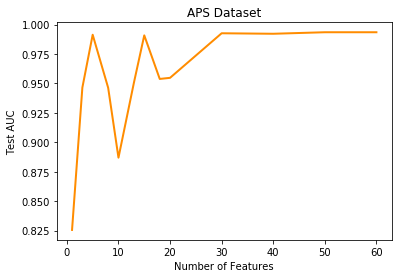

In [797]:
plt.figure()
plt.plot(n_features,test_auc, color='darkorange',lw=2)
plt.xlabel('Number of Features')
plt.ylabel('Test AUC')
plt.title('APS Dataset')
plt.savefig("APS.png")
plt.show()